# MATH 210 Introduction to Mathematical Computing

## March 16, 2022

* Euler's method
* Examples
* Error formula

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Euler's Method

Most differential equations are impossible to solve in terms of elementary formulas. For example, we can solve $y' = y + 1$ exactly using to separation of variables or integrating factor and we find

$$
y(t) = Ce^{t} - 1
$$

However, there is no nice formula for the solution of the equation $y' = \cos(t) + \sin(y)$. So what do we do? Approximate!

Consider a first order differential equation $y' = f(t,y)$, $y(t_0)=y_0$. The Taylor series of the solution is

$$
y(t) = y(t_0) + y'(t_0)(t - t_0) + \frac{y''(t_0)}{2}(t - t_0)^2 + \cdots
$$

We can approximate the value $y(t_1)$ at $t_1$ by

$$
y(t_1) \approx y(t_0) + y'(t_0)(t_1 - t_0)
$$

If we repeat this calculation, we get a recursive sequence

$$
y_{n+1} = y_n + f(t_n,y_n)(t_{n+1} - t_n)
$$

where $y_n \approx y(t_n)$.

Write a function called `odeEuler` which takes `f`, `t` and `y0` where:

* `f` is a function of 2 variables representing the right side of $y' = f(t,y)$
* `t` is an array of $t$ values
* `y0` is the initial value $y(t_0)$ where $t_0$ corresponds to `t[0]`

The function returns the NumPy array of $y$ values $[y_0,y_1,\dots,y_N]$ where $N+1$ is the length of `t`.

In [2]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

In [3]:
f = lambda t,y: y + 1
t = [0,1]
y0 = 1
odeEuler(f,t,y0) # [1,3] y1 = y0 + f(t0,y0)*(t1 - t0) = 1 + 2*(1 - 0)

array([1., 3.])

## Examples

### Example 1

Consider the equation $y' = y + 1$, $y(0) = 1$.

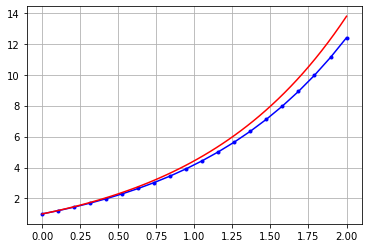

In [4]:
f = lambda t,y: y + 1
t = np.linspace(0,2,20); y0 = 1;
y = odeEuler(f,t,y0)
plt.plot(t,y,'b.-'), plt.grid(True)
t_sol = np.linspace(0,2,50)
y_sol = 2*np.exp(t_sol) - 1
plt.plot(t_sol,y_sol,'r')
plt.show()

### Example 2

Consider the equation $y' = 1 - y$. Plot the Euler's method approximation for different initial values along with the slope field.

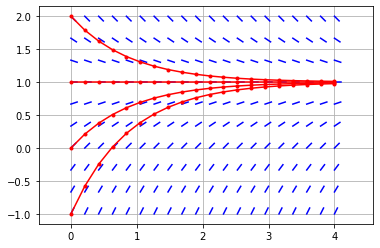

In [5]:
L = 0.1
t0 = 0; t1 = 4; N = 20; t = np.linspace(t0,t1,N)
y0 = -1; y1 = 2; M = 10; y = np.linspace(y0,y1,M);
f = lambda t,y: 1 - y
for n in range(0,N):
    for m in range(0,M):
        slope = f(t[n],y[m])
        theta = np.arctan(slope)
        dt = L*np.cos(theta)
        dy = L*np.sin(theta)
        plt.plot([t[n],t[n]+dt],[y[m],y[m]+dy],'b')
plt.grid(True), plt.axis('equal')
t = np.linspace(t0,t1,20)
for y0 in range(-1,3):
    y = odeEuler(f,t,y0)
    plt.plot(t,y,'r.-')
plt.show()